# Preparation

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
#import most_ambiguous_points_global
data = pd.read_csv('most_ambiguous_points_global.csv')
# import data_train 
data_train = pd.read_csv('train.csv')
# import data_val
data_valid = pd.read_csv('val.csv')
# import data_test
data_test = pd.read_csv('test.csv')


In [7]:
data.head()

patientid  reldatetime circulatory_state  class    vm1    vm3   vm4   vm5  \
0      10952      90300.0           Failure      0   91.0   96.0  50.0  64.0   
1      28880    1372200.0            Stable      1  112.0  141.0  55.0  81.0   
2      24021      41400.0           Failure      1   85.0   87.0  48.0  62.0   
3      30718     110100.0            Stable      1   72.0  121.0  66.0  87.0   
4       3384      49200.0            Stable      1   74.0  129.0  67.0  91.0   

    vm13  vm20  ...  vm146  vm172  vm174  vm176  pm41  pm42  pm43  pm44  pm87  \
0  5.375  96.0  ...    1.0   0.95   10.3   14.0   0.0   0.0   0.0   0.0   0.0   
1  8.250  94.0  ...    1.0   1.08    8.1   37.0   0.0   0.0   0.0   0.0   0.0   
2  5.375  97.0  ...    1.5   1.10    9.2   52.0   0.0   0.0   0.0   0.0   0.0   
3  5.200  98.0  ...    1.0   0.95    6.7   84.0   0.0   0.0   0.0   0.0   0.0   
4  5.300  97.0  ...    1.0   0.95    6.3    4.0   0.0   0.0   0.0   0.0   0.0   

   ambiguity  
0   0.139389  
1   0.291072  
2   0.264772  
3   0.509642  
4   0.246868  

[5 rows x 23 columns]

In [3]:
data_ambiguity_sort = data 

#mélanger data
data = data_ambiguity_sort.sample(frac=1).reset_index(drop=True)

In [4]:
#sélectionner les valeurs failure de data global
data_global_failure = data[data['class'] == 'Failure']

data_global_failure.head()


patientid  reldatetime circulatory_state    class    vm1   vm3   vm4  \
11       3005     109800.0           Failure  Failure   84.0  87.0  53.0   
18      24933      16500.0           Failure  Failure  107.0  90.0  49.0   
21      23649      24300.0           Failure  Failure   72.0  89.0  41.0   
30       1755      69600.0           Failure  Failure   79.0  88.0  42.0   
39      18911      12300.0           Failure  Failure   64.0  90.0  48.0   

     vm5  vm13  vm20  ...  vm146  vm172  vm174  vm176  pm41  pm42  pm43  pm44  \
11  64.0   5.3  97.0  ...    1.0   1.01    8.1    4.0   0.0   0.0   0.0   0.0   
18  65.0   5.2  95.0  ...    1.0   0.95   12.6    4.0   0.0   0.0   0.0   0.0   
21  56.0   5.2  98.0  ...    1.0   0.95    5.0    4.0   0.0   0.0   0.0   0.0   
30  55.0   5.2  99.0  ...    1.0   0.95    7.4   77.0   0.0   0.0   0.0   0.0   
39  63.0   5.2  98.0  ...    1.0   0.95    9.7    4.0   0.0   0.0   0.0   0.0   

    pm87  ambiguity  
11   0.0   0.088855  
18   0.0   0.747195  
21   0.0   0.354959  
30   0.0   0.771261  
39   0.0   0.366677  

[5 rows x 23 columns]

In [6]:
# voir la proportion de failure dans le train set

# voir la proportion de failure dans le train set
data_failure = data_train[data_train['class'] == 'Failure']
#calul proportion failure
print("Pourcentage de données failure dans data_train : ", len(data_failure)/len(data_train)*100)


data_failure = data_test[data_test['class'] == 'Failure']
#calul proportion failure
print("Pourcentage de données failure dans data_test : ", len(data_failure)/len(data_test)*100)

# voir la proportion de failure dans le train set
data_failure = data_valid[data_valid['class'] == 'Failure']
#calul proportion failure
print("Pourcentage de données failure dans data_valid : ", len(data_failure)/len(data_valid)*100)


# voir la proportion de failure dans le data_other set
data_failure = data[data['class'] == 'Failure']
#calul proportion failure
print("Pourcentage de données failure dans data_other : ", len(data_failure)/len(data)*100)


# voir la proportion de failure dans le data_global_failure
data_failure = data_global_failure[data_global_failure['class'] == 'Failure']
#calul proportion failure
print("Pourcentage de données failure dans data_other : ", len(data_failure)/len(data_global_failure)*100)

Pourcentage de données failure dans data_train :  11.184688643727618
Pourcentage de données failure dans data_test :  11.667494128738221
Pourcentage de données failure dans data_valid :  11.542259138807227
Pourcentage de données failure dans data_other :  11.64530199563264
Pourcentage de données failure dans data_other :  100.0


In [7]:
#nombre de données par dataset
print("Nombre de données dans data_train : ", len(data_train))
print("Nombre de données dans data_test : ", len(data_test))
print("Nombre de données dans data_valid : ", len(data_valid))
print("Nombre de données dans data_other : ", len(data))
print("Nombre de données dans data_global_failure : ", len(data_global_failure))

Nombre de données dans data_train :  381155
Nombre de données dans data_test :  358526
Nombre de données dans data_valid :  179263
Nombre de données dans data_other :  34933684
Nombre de données dans data_global_failure :  4068133


In [20]:
data_ambiguity_sort.head()

patientid  reldatetime circulatory_state    class   vm1   vm3   vm4   vm5  \
0      19403      85800.0           Failure  Failure  91.0  88.0  44.0  55.0   
1      19403      85800.0           Failure  Failure  91.0  88.0  44.0  55.0   
2      19403      85800.0           Failure  Failure  91.0  88.0  44.0  55.0   
3      19403      85800.0           Failure  Failure  91.0  88.0  44.0  55.0   
4      14929      34500.0           Failure  Failure  80.0  76.5  49.5  59.0   

    vm13  vm20  ...  vm146  vm172      vm174  vm176  pm41  pm42  pm43  pm44  \
0  5.375  43.0  ...    1.0   1.12   8.950597   15.0   0.0   0.0   0.0   0.0   
1  5.300  43.0  ...    1.0   1.12   8.940864   15.0   0.0   0.0   0.0   0.0   
2  5.300  43.0  ...    1.0   1.12   8.950000   15.0   0.0   0.0   0.0   0.0   
3  5.300  43.0  ...    1.0   1.12   8.952320   15.0   0.0   0.0   0.0   0.0   
4  5.375  22.0  ...    1.0   0.95  10.300000    4.0   0.0   0.0   0.0   0.0   

   pm87  ambiguity  
0   0.0   8.602664  
1   0.0   8.601453  
2   0.0   8.601346  
3   0.0   8.601318  
4   0.0   8.600425  

[5 rows x 23 columns]

In [25]:
#afficher la moyenne des ambiguités 
print("Moyenne des ambiguités : ", data_ambiguity_sort['ambiguity'].mean())
#afficher la moyenne des ambiguités pour les données failure
print("Moyenne des ambiguités pour les données failure : ", data_ambiguity_sort[data_ambiguity_sort['class'] == 'Failure']['ambiguity'].mean())
#afficher la moyenne des ambiguités pour les données non failure
print("Moyenne des ambiguités pour les données non failure : ", data_ambiguity_sort[data_ambiguity_sort['class'] == 'Stable']['ambiguity'].mean())
#variance
print("Variance des ambiguités : ", data_ambiguity_sort['ambiguity'].var())
#variance
print("Variance des ambiguités pour les données failure : ", data_ambiguity_sort[data_ambiguity_sort['class'] == 'Failure']['ambiguity'].var())
#variance
print("Variance des ambiguités pour les données non failure : ", data_ambiguity_sort[data_ambiguity_sort['class'] == 'Stable']['ambiguity'].var())


Moyenne des ambiguités :  0.5605666145136201
Moyenne des ambiguités pour les données failure :  0.7189773707488138
Moyenne des ambiguités pour les données non failure :  0.5396878028904568
Variance des ambiguités :  0.39580721849315276
Variance des ambiguités pour les données failure :  0.8188806414100357
Variance des ambiguités pour les données non failure :  0.3363020811883848


In [27]:
#médiane
print("Médiane des ambiguités : ", data_ambiguity_sort['ambiguity'].median())
#médiane
print("Médiane des ambiguités pour les données failure : ", data_ambiguity_sort[data_ambiguity_sort['class'] == 'Failure']['ambiguity'].median())
#médiane
print("Médiane des ambiguités pour les données non failure : ", data_ambiguity_sort[data_ambiguity_sort['class'] == 'Stable']['ambiguity'].median())
#min max 
print("Min des ambiguités : ", data_ambiguity_sort['ambiguity'].min())
print("Max des ambiguités : ", data_ambiguity_sort['ambiguity'].max())
#min max pour données failure
print("Min des ambiguités pour les données failure : ", data_ambiguity_sort[data_ambiguity_sort['class'] == 'Failure']['ambiguity'].min())
print("Max des ambiguités pour les données failure : ", data_ambiguity_sort[data_ambiguity_sort['class'] == 'Failure']['ambiguity'].max())
#min max pour données non failure
print("Min des ambiguités pour les données non failure : ", data_ambiguity_sort[data_ambiguity_sort['class'] == 'Stable']['ambiguity'].min())
print("Max des ambiguités pour les données non failure : ", data_ambiguity_sort[data_ambiguity_sort['class'] == 'Stable']['ambiguity'].max())


Médiane des ambiguités :  0.4137296184991488
Médiane des ambiguités pour les données failure :  0.4886920765273821
Médiane des ambiguités pour les données non failure :  0.4050600520111289
Min des ambiguités :  1.8364289200434317e-08
Max des ambiguités :  8.602664077814296
Min des ambiguités pour les données failure :  4.5934188008800454e-08
Max des ambiguités pour les données failure :  8.602664077814296
Min des ambiguités pour les données non failure :  1.8364289200434317e-08
Max des ambiguités pour les données non failure :  8.573465773607454


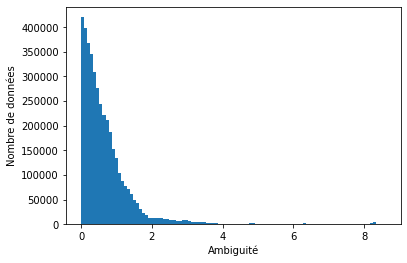

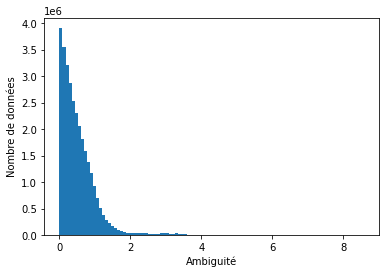

In [29]:
#afficher historigram de l'ambiguité des données failure
plt.hist(data_ambiguity_sort[data_ambiguity_sort['class'] == 'Failure']['ambiguity'], bins=100)
# plt.title("Histogramme de l'ambiguité des données failure")
plt.xlabel("Ambiguité")
plt.ylabel("Nombre de données")
plt.show()

#afficher historigram de l'ambiguité des données non failure
plt.hist(data_ambiguity_sort[data_ambiguity_sort['class'] == 'Stable']['ambiguity'], bins=100)
# plt.title("Histogramme de l'ambiguité des données non failure")
plt.xlabel("Ambiguité")
plt.ylabel("Nombre de données")
plt.show()

# Normalisation

In [5]:
# choisi les colonnes
columns_to_cluster = ['vm1', 'vm3', 'vm4', 'vm5', 'vm13', 'vm20', 'vm28', 'vm62', 'vm136', 'vm146', 'vm172', 'vm174', 'vm176', 'pm41', 'pm42', 'pm43', 'pm44', 'pm87']
data_to_cluster_train = data_train[columns_to_cluster]
data_to_cluster_valid = data_valid[columns_to_cluster]
data_to_cluster_test = data_test[columns_to_cluster]
data_to_cluster_other = data[columns_to_cluster]

# normalise
# Normalisation
scaler = StandardScaler()
# Utilisez uniquement l'ensemble d'entraînement pour le fit
scaler.fit(data_to_cluster_train)

# Transformez tous les ensembles de données en utilisant les statistiques de l'ensemble d'entraînement
scaled_data_train = scaler.transform(data_to_cluster_train)
scaled_data_valid = scaler.transform(data_to_cluster_valid)
scaled_data_test = scaler.transform(data_to_cluster_test)
scaled_data_global = scaler.transform(data_to_cluster_other)



#add special dataset
data_to_cluster_other_failure = data_global_failure[columns_to_cluster]

# Transformez tous les ensembles de données en utilisant les statistiques de l'ensemble d'entraînement
scaled_data_other_failure = scaler.transform(data_to_cluster_other_failure)

# Active learning

les étapes  pour l'apprentissage avec l'apprentissage actif:

- crée modèle ou prendre modèle existant, frise et réentrainement (attention au surapprentissage)
SVM, Random Forest, k-NN ou CNN

- utiliser un pourcentage de données labélisé 1% pour l'entrainement initial
- évaluer les performances : métriques telles que la précision, le rappel, la F-mesure, l'AUC-ROC
- visualiser les clusters avec valeurs annotées. (utiliser PCA pour visualiser en 2D ou 3D)
- utiliser les clusters pour demander d'annoter des nouvelles valeurs ambigues / incertain
-mettre à jour le modèle avec les nouvelles annotations--> réentrainement
- évaluer les performances :métriques telles que la précision, le rappel, la F-mesure, l'AUC-ROC
boucles jusqu'à performances satisfaisant:
    - identificationd des éléments incertains avec ce nouveeau modèle
    - -mettre à jour le modèle avec les nouvelles annotations--> réentrainement
    - évaluer les performances : métriques telles que la précision, le rappel, la F-mesure, l'AUC-ROC


1% patient 

### Sélection d'un modèle

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def evaluate_performance(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    
    print("Accuracy: {:.2f}".format(accuracy))
    print("Precision: {:.2f}".format(precision))
    print("Recall: {:.2f}".format(recall))
    print("F1 Score: {:.2f}".format(f1))


- Accuracy : proportion de prédictions correctes
- Précision : proportion de vrais positifs parmi les prédictions positives
- Rappel : proportion de vrais positifs correctement identifiés
- F-mesure : mesure pondérée de précision et rappel
- AUC-ROC : capacité à distinguer les échantillons positifs et négatifs

clustering sans test


- SVM
fixer itération, baisser -> moins grave pour 

tolérance 1e-2

estimation rapide

modèle plus rapide 

pca --> réduit don cp
pca-> puis apprentissage svm

knn pas plus rapide


### création d'un modèle - C-Support Vector Classification

In [16]:
from sklearn import svm
import matplotlib.pyplot as plt

    # tol : float, default=1e-3
    #     Tolerance for stopping criterion.


# # Création du modèle SVM
# svm_model = SVC(probability=True, random_state=1, verbose=True, tol=1e-4, max_iter=1000)

# Création et entraînement du modèle
svm_model =  svm.SVC(kernel='linear', C=1, probability=True, random_state=1, tol=1e-1)
# Entraînement du modèle initial avec les données d'entraînement
svm_model.fit(scaled_data_train, data_train['class'])

In [ ]:
#save model svm_model
import pickle
pickle.dump(svm_model, open('svm_model_tolerance.sav', 'wb'))

In [ ]:
# Prédiction et évaluation des performances initiales
y_pred = svm_model.predict(scaled_data_test)
y_true = data_test['class']
evaluate_performance(y_true, y_pred)

#faire pareil avec les données valid
y_pred = svm_model.predict(scaled_data_valid)
y_true = data_valid['class']
evaluate_performance(y_true, y_pred)

#faire pareil avec les données global
y_pred = svm_model.predict(scaled_data_global)
y_true = data['class']
evaluate_performance(y_true, y_pred)



In [7]:
from sklearn import svm
import matplotlib.pyplot as plt


# # Création du modèle SVM
# svm_model = SVC(probability=True, random_state=1, verbose=True, tol=1e-4, max_iter=1000)


# Création et entraînement du modèle
svm_model =  svm.SVC(kernel='linear', C=1, probability=True, random_state=1, tol=1e-2, max_iter=1000)
# Entraînement du modèle initial avec les données d'entraînement
svm_model.fit(scaled_data_train, data_train['class'])


c:\Users\antho\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(C=1, kernel='linear', max_iter=1000, probability=True, random_state=1,
    tol=0.01)

In [8]:
# Prédiction et évaluation des performances initiales
y_pred = svm_model.predict(scaled_data_test)
y_true = data_test['class']
evaluate_performance(y_true, y_pred)

#faire pareil avec les données valid
y_pred = svm_model.predict(scaled_data_valid)
y_true = data_valid['class']
evaluate_performance(y_true, y_pred)

#faire pareil avec les données global
y_pred = svm_model.predict(scaled_data_global)
y_true = data['class']
evaluate_performance(y_true, y_pred)

Accuracy: 0.87
Precision: 0.67
Recall: 0.63
F1 Score: 0.65
Accuracy: 0.87
Precision: 0.67
Recall: 0.63
F1 Score: 0.65
Accuracy: 0.87
Precision: 0.67
Recall: 0.63
F1 Score: 0.65


59 minutes

In [9]:
# Création et entraînement du modèle
svm_model =  svm.SVC(kernel='linear', C=1, probability=True, random_state=1, tol=1e-2, max_iter=2000)
# Entraînement du modèle initial avec les données d'entraînement
svm_model.fit(scaled_data_train, data_train['class'])
# Prédiction et évaluation des performances initiales
y_pred = svm_model.predict(scaled_data_test)
y_true = data_test['class']
evaluate_performance(y_true, y_pred)

#faire pareil avec les données valid
y_pred = svm_model.predict(scaled_data_valid)
y_true = data_valid['class']
evaluate_performance(y_true, y_pred)

#faire pareil avec les données global
y_pred = svm_model.predict(scaled_data_global)
y_true = data['class']
evaluate_performance(y_true, y_pred)


c:\Users\antho\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Accuracy: 0.89
Precision: 0.76
Recall: 0.55
F1 Score: 0.56
Accuracy: 0.89
Precision: 0.75
Recall: 0.55
F1 Score: 0.56
Accuracy: 0.89
Precision: 0.75
Recall: 0.55
F1 Score: 0.56


102 minutes

In [ ]:
#save model svm_model
import pickle
pickle.dump(svm_model, open('svm_model_2000.sav', 'wb'))

In [10]:
#afficher la matrice de confusion
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred)

array([[  446307,  3621826],
       [  279301, 30586250]], dtype=int64)

### PCA améliore la rapidité (performance pas trop en chute ?)

In [11]:
data_test.head()

patientid  reldatetime circulatory_state    class   vm1    vm3   vm4   vm5  \
0      23405     256200.0           Failure  Failure  85.0   74.0  38.0  50.0   
1      25866     185100.0            Stable   Stable  81.0  162.0  52.0  83.0   
2      21918      86100.0            Stable   Stable  94.0  123.0  55.0  74.0   
3      18659     365400.0            Stable   Stable  80.0  149.0  57.0  88.0   
4      21684      43500.0           Failure  Failure  80.0   82.0  42.0  54.0   

   vm13  vm20  ...     vm136  vm146  vm172  vm174  vm176  pm41  pm42  pm43  \
0   5.3  97.0  ...  1.098804    1.0   1.12    9.1  225.0  0.00   0.0   0.0   
1   5.3  93.0  ...  0.921978    1.0   0.95    7.0  137.0  0.00   0.0   0.0   
2   5.2  99.0  ...  1.339492    1.0   0.95    9.5    6.0  0.00   0.0   0.0   
3   5.3  97.0  ...  1.000000    1.0   0.95    4.6    4.0  0.00   0.0   0.0   
4   5.3  98.0  ...  2.300000    3.0   1.11    8.3   38.0  0.25   0.0   0.0   

   pm44  pm87  
0   0.0   0.0  
1   0.0   0.0  
2   0.0   0.0  
3   0.0   0.0  
4   0.0   0.0  

[5 rows x 22 columns]

In [12]:
from sklearn.decomposition import PCA

# Visualisation des clusters avec PCA
pca = PCA(n_components=2)
pca_data_train = pca.fit_transform(scaled_data_train)
pca_data_test = pca.transform(scaled_data_test)
print('Explication de la variance en pourcentage :', pca.explained_variance_ratio_)

data_train_pca=data_train

# Convertit la colonne "class" en numérique
data_train_pca['class'] = pd.factorize(data_train['class'])[0]
#inverser 1 et 0 de la colonne class
data_train_pca['class'] = data_train_pca['class'].apply(lambda x: 1 if x==0 else 0)

# Utilise les nouvelles valeurs numériques pour la coloration
plt.scatter(pca_data_train[:, 0], pca_data_train[:, 1], c=data_train_pca['class'], cmap='viridis', marker='o', s=100, edgecolors='k', alpha=0.5)
plt.title("Visualisation des clusters avec PCA")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.legend(['Données d\'entraînement'])
plt.show()

data_test_pca=data_test

# Convertit la colonne "class" en numérique
data_test_pca['class'] = pd.factorize(data_test['class'])[0]
#inverser 1 et 0 de la colonne class
data_test_pca['class'] = data_test_pca['class'].apply(lambda x: 1 if x==0 else 0)

plt.scatter(pca_data_test[:, 0], pca_data_test[:, 1], c=data_test_pca['class'], cmap='viridis', marker='x', s=100, edgecolors='k', alpha=0.5)

print('Explication de la variance en pourcentage :', pca.explained_variance_ratio_)

plt.title("Visualisation des clusters avec PCA")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.legend([ 'Données de test'])
plt.show()

Explication de la variance en pourcentage : [0.19267964 0.11079329]


C:\Users\antho\AppData\Local\Temp/ipykernel_6908/2749741172.py:31: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(pca_data_test[:, 0], pca_data_test[:, 1], c=data_test_pca['class'], cmap='viridis', marker='x', s=100, edgecolors='k', alpha=0.5)


Explication de la variance en pourcentage : [0.19267964 0.11079329]


In [13]:
#pca pour expliquer 95% de la variance
pca = PCA(n_components=0.95)
pca_data_train = pca.fit_transform(scaled_data_train)
pca_data_test = pca.transform(scaled_data_test)
print('Explication de la variance en pourcentage :', pca.explained_variance_ratio_)
print('Nombre de composantes principales :', pca.n_components_)


Explication de la variance en pourcentage : [0.19267965 0.1107933  0.08719304 0.07858867 0.07092491 0.07018837
 0.06300281 0.06066845 0.05369393 0.05190721 0.04419279 0.0349197
 0.03230467]
Nombre de composantes principales : 13


In [14]:
#afficher coubre de variance expliquée
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Nombre de composantes')
plt.ylabel('Variance expliquée cumulée')
plt.show()


In [15]:
from sklearn import svm
import matplotlib.pyplot as plt


# # Création du modèle SVM
# svm_model = SVC(probability=True, random_state=1, verbose=True, tol=1e-4, max_iter=1000)


# Création et entraînement du modèle
svm_model =  svm.SVC(kernel='linear', C=1, probability=True, random_state=1, tol=1e-2, max_iter=1000)
# Entraînement du modèle initial avec les données d'entraînement
svm_model.fit(pca_data_train, data_train['class'])


c:\Users\antho\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(C=1, kernel='linear', max_iter=1000, probability=True, random_state=1,
    tol=0.01)

In [16]:
y_pred = svm_model.predict(pca_data_test)
y_true = data_test['class']
evaluate_performance(y_true, y_pred)

Accuracy: 0.10
Precision: 0.20
Recall: 0.37
F1 Score: 0.09


In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred)

array([[  5383, 311312],
       [ 11839,  29992]], dtype=int64)

- temps : gain 10 %, 
- performance : moins bonne 

# test avec d'autres modèles

### knn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

# Création du modèle k-NN
k = 5  # Choisir le nombre de voisins
knn_model = KNeighborsClassifier(n_neighbors=k)

# Entraînement du modèle initial avec les données d'entraînement
knn_model.fit(scaled_data_train, data_train['class'])

# Faire des prédictions et évaluer la performance avec les données de test
y_pred_knn = knn_model.predict(scaled_data_test)
y_test_pred_proba_knn = knn_model.predict_proba(scaled_data_test)[:, 1]
evaluate_performance(data_test['class'], y_pred_knn, y_test_pred_proba_knn)
print(confusion_matrix(data_test['class'], y_pred_knn))

# Faire des prédictions et évaluer la performance avec les données de validation
y_pred_knn = knn_model.predict(scaled_data_valid)
y_test_pred_proba_knn = knn_model.predict_proba(scaled_data_valid)[:, 1]
evaluate_performance(data_valid['class'], y_pred_knn, y_test_pred_proba_knn)
print(confusion_matrix(data_valid['class'], y_pred_knn))

# Faire des prédictions et évaluer la performance avec les données globales
y_pred_knn = knn_model.predict(scaled_data_global)
y_test_pred_proba_knn = knn_model.predict_proba(scaled_data_global)[:, 1]
evaluate_performance(data['class'], y_pred_knn, y_test_pred_proba_knn)
print(confusion_matrix(data['class'], y_pred_knn))


KeyboardInterrupt: 

plus de 11h--> pas envisagable

### random forest

In [12]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=1)
rf_model.fit(scaled_data_train, data_train['class'])

# Make predictions and evaluate the performance
y_true = data_test['class']
y_pred_rf = rf_model.predict(scaled_data_test)
y_test_pred_proba_rf = rf_model.predict_proba(scaled_data_test)[:, 1]
evaluate_performance(y_true, y_pred_rf, y_test_pred_proba_rf)
confusion_matrix(y_true, y_pred_rf)
#faire pareil avec les données valid
y_pred_rf = rf_model.predict(scaled_data_valid)
y_true = data_valid['class']
y_test_pred_proba_rf = rf_model.predict_proba(scaled_data_valid)[:, 1]
evaluate_performance(y_true, y_pred_rf, y_test_pred_proba_rf)
confusion_matrix(y_true, y_pred_rf)
#faire pareil avec les données global
y_pred_rf = rf_model.predict(scaled_data_global)
y_true = data['class']
y_test_pred_proba_rf = rf_model.predict_proba(scaled_data_global)[:, 1]
evaluate_performance(y_true, y_pred_rf, y_test_pred_proba_rf)
confusion_matrix(y_true, y_pred_rf)


Accuracy: 0.54
Precision: 0.76
Recall: 0.54
F1 Score: 0.42
ROC AUC: 0.78
Accuracy: 0.54
Precision: 0.76
Recall: 0.54
F1 Score: 0.42
ROC AUC: 0.78
Accuracy: 0.95
Precision: 0.92
Recall: 0.82
F1 Score: 0.86
ROC AUC: 0.98


array([[ 2510099,  1352592],
       [  347207, 30715115]], dtype=int64)

37 minutes

In [13]:
# Create and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=200, random_state=1)
rf_model.fit(scaled_data_train, data_train['class'])

# Make predictions and evaluate the performance
y_true = data_test['class']
y_pred_rf = rf_model.predict(scaled_data_test)
y_test_pred_proba_rf = rf_model.predict_proba(scaled_data_test)[:, 1]
evaluate_performance(y_true, y_pred_rf, y_test_pred_proba_rf)
confusion_matrix(y_true, y_pred_rf)
#faire pareil avec les données valid
y_pred_rf = rf_model.predict(scaled_data_valid)
y_true = data_valid['class']
y_test_pred_proba_rf = rf_model.predict_proba(scaled_data_valid)[:, 1]
evaluate_performance(y_true, y_pred_rf, y_test_pred_proba_rf)
confusion_matrix(y_true, y_pred_rf)
#faire pareil avec les données global
y_pred_rf = rf_model.predict(scaled_data_global)
y_true = data['class']
y_test_pred_proba_rf = rf_model.predict_proba(scaled_data_global)[:, 1]
evaluate_performance(y_true, y_pred_rf, y_test_pred_proba_rf)
confusion_matrix(y_true, y_pred_rf)

Accuracy: 0.54
Precision: 0.76
Recall: 0.54
F1 Score: 0.42
ROC AUC: 0.80
Accuracy: 0.54
Precision: 0.76
Recall: 0.54
F1 Score: 0.42
ROC AUC: 0.80
Accuracy: 0.95
Precision: 0.92
Recall: 0.82
F1 Score: 0.86
ROC AUC: 0.98


array([[ 2510414,  1352277],
       [  324915, 30737407]], dtype=int64)

45 minutes

In [15]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import PredefinedSplit
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
#import make scorer
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score
# GridSearchCV
from sklearn.model_selection import GridSearchCV


# Concatenate the training and validation data
train_valid_data = np.concatenate((scaled_data_train, scaled_data_valid), axis=0)
train_valid_labels = np.concatenate((data_train['class'], data_valid['class']), axis=0)

# Create a list where -1 indicates a training instance and 0 indicates a validation instance
split_index = [-1]*len(scaled_data_train) + [0]*len(scaled_data_valid)

# Create a PredefinedSplit object
pds = PredefinedSplit(test_fold=split_index)

# Utiliser le score F1 pour l'optimisation avec average='weighted' pour prendre en compte le déséquilibre des classes
f1_scorer = make_scorer(f1_score, average='macro')

# Création du modèle Random Forest
rf_model = RandomForestClassifier(random_state=1)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
}

# Passer cet objet en tant que paramètre cv à GridSearchCV
grid_search = GridSearchCV(rf_model, param_grid, cv=pds, scoring=f1_scorer)

# Entraîner le modèle
grid_search.fit(train_valid_data, train_valid_labels)

# Afficher les meilleurs paramètres trouvés
print("Best parameters: ", grid_search.best_params_)
# Utiliser le meilleur modèle pour faire des prédictions
best_rf_model = grid_search.best_estimator_

# Faire des prédictions et évaluer les performances avec les autres ensembles de données
print("\nDonnées de test ")
y_true = data_test['class']
y_pred_rf = best_rf_model.predict(scaled_data_test)
evaluate_performance(y_true, y_pred_rf)
confusion_matrix(y_true, y_pred_rf)
print("\nDonnées de validation ")
y_pred_rf = best_rf_model.predict(scaled_data_valid)
y_true = data_valid['class']
evaluate_performance(y_true, y_pred_rf)
confusion_matrix(y_true, y_pred_rf)
print("\nDonnées globales ")
y_pred_rf = best_rf_model.predict(scaled_data_global)
y_true = data['class']
evaluate_performance(y_true, y_pred_rf)
confusion_matrix(y_true, y_pred_rf)



Best parameters:  {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 100}

Données de test 
Accuracy: 0.97
Precision: 0.91
Recall: 0.95
F1 Score: 0.93

Données de validation 
Accuracy: 0.97
Precision: 0.91
Recall: 0.95
F1 Score: 0.93

Données globales 
Accuracy: 0.97
Precision: 0.91
Recall: 0.95
F1 Score: 0.93
CPU times: total: 45min 53s
Wall time: 46min 33s


array([[ 3768955,   299178],
       [  804275, 30061276]], dtype=int64)

32 minutes

In [ ]:
# Create and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=10, random_state=1)
rf_model.fit(scaled_data_train, data_train['class'])

# Make predictions and evaluate the performance
y_true = data_test['class']
y_pred_rf = rf_model.predict(scaled_data_test)
y_test_pred_proba_rf = rf_model.predict_proba(scaled_data_test)[:, 1]
evaluate_performance(y_true, y_pred_rf, y_test_pred_proba_rf)
confusion_matrix(y_true, y_pred_rf)
#faire pareil avec les données valid
y_pred_rf = rf_model.predict(scaled_data_valid)
y_true = data_valid['class']
y_test_pred_proba_rf = rf_model.predict_proba(scaled_data_valid)[:, 1]
evaluate_performance(y_true, y_pred_rf, y_test_pred_proba_rf)
confusion_matrix(y_true, y_pred_rf)
#faire pareil avec les données global
y_pred_rf = rf_model.predict(scaled_data_global)
y_true = data['class']
y_test_pred_proba_rf = rf_model.predict_proba(scaled_data_global)[:, 1]
evaluate_performance(y_true, y_pred_rf, y_test_pred_proba_rf)
confusion_matrix(y_true, y_pred_rf)

## autres modèle plus complexe

Stochastic Gradient Descent Classifier -->
- utilise la méthode d'optimisation de descente de gradient stochastique pour trouver le minimum local d'une Loss Fonction
    - avec batch --> toutes les données sont utilisés pour mettre à jour les paramètres du modèle
    - avec stoch : 1 example donc plus rapide mais moins précis

- -->   méthode stochastique pour optimiser, l'ordre des données à un impact sur les résultatl. donc, mélanger les données peut permettre d'arriver à d'autre résultats


pas besoin d'avoir le meilleur modèle avec les meilleures hyperparamètres--> juste une estimation de l'apprentissage actif.

In [8]:
%%time
# Import necessary libraries
from sklearn.model_selection import PredefinedSplit
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, f1_score, make_scorer
from sklearn.model_selection import GridSearchCV

# Concatenate the training and global data
train_global_data = np.concatenate((scaled_data_train, scaled_data_global), axis=0)
train_global_labels = np.concatenate((data_train['class'], data['class']), axis=0)

# Create a list where -1 indicates a training instance and 0 indicates a validation instance
split_index = [-1]*len(scaled_data_train) + [0]*len(scaled_data_global)

# Create a PredefinedSplit object
pds = PredefinedSplit(test_fold=split_index)

# Utiliser le score F1 pour l'optimisation avec average='weighted' pour prendre en compte le déséquilibre des classes
f1_scorer = make_scorer(f1_score, average='macro')

param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
}

# Création du modèle SGDClassifier
sgd_model = SGDClassifier(random_state=1)

# Pass this object as the cv parameter to GridSearchCV
grid_search = GridSearchCV(sgd_model, param_grid, cv=pds, scoring=f1_scorer)

# Train the model
grid_search.fit(train_global_data, train_global_labels)

# Display the best parameters found
print("Best parameters: ", grid_search.best_params_)

# Use the best model to make predictions
best_sgd_model = grid_search.best_estimator_

# Faire des prédictions et évaluer les performances avec les autres ensembles de données
print("\nDonnées de test ")
y_pred_sgd = best_sgd_model.predict(scaled_data_test)
evaluate_performance(data_test['class'], y_pred_sgd)
print(confusion_matrix(data_test['class'], y_pred_sgd))

print("\nDonnées de validation ")
y_pred_sgd = best_sgd_model.predict(scaled_data_valid)
evaluate_performance(data_valid['class'], y_pred_sgd)
print(confusion_matrix(data_valid['class'], y_pred_sgd))


c:\Users\antho\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\antho\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\antho\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\antho\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\antho\anaconda3\lib\site-packages\sklearn\linear_mo

Best parameters:  {'alpha': 0.0001, 'loss': 'hinge', 'penalty': 'l1'}

Données de test 
Accuracy: 0.97
Precision: 0.92
Recall: 0.91
F1 Score: 0.92
[[ 35075   6756]
 [  5313 311382]]

Données de validation 
Accuracy: 0.97
Precision: 0.92
Recall: 0.91
F1 Score: 0.92
[[ 17366   3325]
 [  2767 155805]]
CPU times: total: 5h 16min 26s
Wall time: 7h 4min 23s


correcte : 

In [14]:
%%time
from sklearn.model_selection import PredefinedSplit
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
#import make scorer
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score
# GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier


# Concatenate the training and validation data
train_valid_data = np.concatenate((scaled_data_train, scaled_data_valid), axis=0)
train_valid_labels = np.concatenate((data_train['class'], data_valid['class']), axis=0)

# Create a list where -1 indicates a training instance and 0 indicates a validation instance
split_index = [-1]*len(scaled_data_train) + [0]*len(scaled_data_valid)

# Create a PredefinedSplit object
pds = PredefinedSplit(test_fold=split_index)

# Utiliser le score F1 pour l'optimisation avec average='weighted' pour prendre en compte le déséquilibre des classes
f1_scorer = make_scorer(f1_score, average='macro')

param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
}


# Création du modèle SGDClassifier
sgd_model = SGDClassifier(random_state=1)

# Pass this object as the cv parameter to GridSearchCV
grid_search = GridSearchCV(sgd_model, param_grid, cv=pds, scoring=f1_scorer)

# Train the model
grid_search.fit(train_valid_data, train_valid_labels)

# Display the best parameters found
print("Best parameters: ", grid_search.best_params_)
# Use the best model to make predictions
best_sgd_model = grid_search.best_estimator_

# Faire des prédictions et évaluer les performances avec les autres ensembles de données
print("\nDonnées de test ")
y_pred_sgd = best_sgd_model.predict(scaled_data_test)
evaluate_performance(data_test['class'], y_pred_sgd)
print(confusion_matrix(data_test['class'], y_pred_sgd))

print("\nDonnées de validation ")
y_pred_sgd = best_sgd_model.predict(scaled_data_valid)
evaluate_performance(data_valid['class'], y_pred_sgd)
print(confusion_matrix(data_valid['class'], y_pred_sgd))

print("\nDonnées globales ")
y_pred_sgd = best_sgd_model.predict(scaled_data_global)
evaluate_performance(data['class'], y_pred_sgd)
print(confusion_matrix(data['class'], y_pred_sgd))



c:\Users\antho\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\antho\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\antho\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\antho\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\antho\anaconda3\lib\site-packages\sklearn\linear_mo

Best parameters:  {'alpha': 0.0001, 'loss': 'hinge', 'penalty': 'l1'}

Données de test 
Accuracy: 0.97
Precision: 0.92
Recall: 0.91
F1 Score: 0.92
[[ 34881   6950]
 [  5361 311334]]

Données de validation 
Accuracy: 0.97
Precision: 0.92
Recall: 0.91
F1 Score: 0.91
[[ 17236   3455]
 [  2757 155815]]

Données globales 
Accuracy: 0.97
Precision: 0.92
Recall: 0.91
F1 Score: 0.92
[[ 3391837   676296]
 [  523667 30341884]]
CPU times: total: 30min 2s
Wall time: 31min 9s


- 0.8338552748=34881/(34881+6950)
- 0.98 =311334/(311334+5361)

In [5]:
# %%time
# from sklearn.linear_model import SGDClassifier
# from sklearn.metrics import confusion_matrix

# # Création du modèle SGDClassifier
# sgd_model = SGDClassifier(random_state=1)

# # Entraînement du modèle initial avec les données d'entraînement
# sgd_model.fit(scaled_data_train, data_train['class'])

# # Faire des prédictions et évaluer la performance avec les données de test
# y_pred_sgd = sgd_model.predict(scaled_data_test)
# y_test_pred_proba_sgd = sgd_model.decision_function(scaled_data_test)
# evaluate_performance(data_test['class'], y_pred_sgd, y_test_pred_proba_sgd)
# print(confusion_matrix(data_test['class'], y_pred_sgd))

# # Faire des prédictions et évaluer la performance avec les données de validation
# y_pred_sgd = sgd_model.predict(scaled_data_valid)
# y_test_pred_proba_sgd = sgd_model.decision_function(scaled_data_valid)
# evaluate_performance(data_valid['class'], y_pred_sgd, y_test_pred_proba_sgd)
# print(confusion_matrix(data_valid['class'], y_pred_sgd))

# # Faire des prédictions et évaluer la performance avec les données globales
# y_pred_sgd = sgd_model.predict(scaled_data_global)
# y_test_pred_proba_sgd = sgd_model.decision_function(scaled_data_global)
# evaluate_performance(data['class'], y_pred_sgd, y_test_pred_proba_sgd)
# print(confusion_matrix(data['class'], y_pred_sgd))


Accuracy: 0.56
Precision: 0.76
Recall: 0.56
F1 Score: 0.46
ROC AUC: 0.98
[[ 22832 156431]
 [    95 179168]]
Accuracy: 0.56
Precision: 0.76
Recall: 0.56
F1 Score: 0.46
ROC AUC: 0.98
[[11392 78239]
 [   52 89579]]
Accuracy: 0.96
Precision: 0.90
Recall: 0.91
F1 Score: 0.90
ROC AUC: 0.98
[[ 3289168   573523]
 [  762231 30300091]]
CPU times: total: 16min 55s
Wall time: 19min 7s


- passif: si correcte
- aggressif si incorrecte

In [11]:
%%time
from sklearn.model_selection import PredefinedSplit
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
#import make scorer
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score
# GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import PassiveAggressiveClassifier

# Création du modèle PassiveAggressiveClassifier
pa_model = PassiveAggressiveClassifier(random_state=1)

param_grid = {
    'C': [0.1, 1.0, 10.0],
    'loss': ['hinge', 'squared_hinge'],
}

# Concatenate the training and validation data
train_valid_data = np.concatenate((scaled_data_train, scaled_data_valid), axis=0)
train_valid_labels = np.concatenate((data_train['class'], data_valid['class']), axis=0)

# Create a list where -1 indicates a training instance and 0 indicates a validation instance
split_index = [-1]*len(scaled_data_train) + [0]*len(scaled_data_valid)

# Create a PredefinedSplit object
pds = PredefinedSplit(test_fold=split_index)

# Utiliser le score F1 pour l'optimisation
f1_scorer = make_scorer(f1_score, average='macro')

# Passer cet objet en tant que paramètre cv à GridSearchCV
grid_search = GridSearchCV(pa_model, param_grid, cv=pds, scoring=f1_scorer)

# Entraîner le modèle
grid_search.fit(train_valid_data, train_valid_labels)

# Afficher les meilleurs paramètres trouvés
print("Best parameters: ", grid_search.best_params_)
# Utiliser le meilleur modèle pour faire des prédictions
best_pa_model = grid_search.best_estimator_

print("\nDonnées de test ")
# Faire des prédictions et évaluer les performances avec les données de test
y_pred_pa = best_pa_model.predict(scaled_data_test)
evaluate_performance(data_test['class'], y_pred_pa)
print(confusion_matrix(data_test['class'], y_pred_pa))

print("\nDonnées de validation ")
# Faire des prédictions et évaluer les performances avec les données de validation
y_pred_pa = best_pa_model.predict(scaled_data_valid)
evaluate_performance(data_valid['class'], y_pred_pa)
print(confusion_matrix(data_valid['class'], y_pred_pa))

print("\nDonnées globales ")
# Faire des prédictions et évaluer les performances avec les données globales
y_pred_pa = best_pa_model.predict(scaled_data_global)
evaluate_performance(data['class'], y_pred_pa)
print(confusion_matrix(data['class'], y_pred_pa))

Best parameters:  {'C': 0.1, 'loss': 'hinge'}

Données de test 
Accuracy: 0.96
Precision: 0.91
Recall: 0.87
F1 Score: 0.89
[[ 31866   9965]
 [  5301 311394]]

Données de validation 
Accuracy: 0.96
Precision: 0.91
Recall: 0.87
F1 Score: 0.89
[[ 15769   4922]
 [  2691 155881]]

Données globales 
Accuracy: 0.96
Precision: 0.91
Recall: 0.87
F1 Score: 0.89
[[ 3095297   972836]
 [  518728 30346823]]
CPU times: total: 18min 4s
Wall time: 18min 26s


utilise un l'hyperplan pour séparer les données
- combinaison des points d'entrés avec fonction d'activation -> pour produire la sortie

In [10]:
%%time
from sklearn.model_selection import PredefinedSplit
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
#import make scorer
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score
# GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Perceptron

# Création du modèle Perceptron
perceptron_model = Perceptron(random_state=1)

param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'penalty': ['l2', 'l1', 'elasticnet']
}
# Concatenate the training and validation data
train_valid_data = np.concatenate((scaled_data_train, scaled_data_valid), axis=0)
train_valid_labels = np.concatenate((data_train['class'], data_valid['class']), axis=0)

# Create a list where -1 indicates a training instance and 0 indicates a validation instance
split_index = [-1]*len(scaled_data_train) + [0]*len(scaled_data_valid)

# Create a PredefinedSplit object
pds = PredefinedSplit(test_fold=split_index)

# Utiliser le score F1 pour l'optimisation 
f1_scorer = make_scorer(f1_score, average='macro')


# Passer cet objet en tant que paramètre cv à GridSearchCV
grid_search = GridSearchCV(perceptron_model, param_grid, cv=pds, scoring=f1_scorer)

# Entraîner le modèle
grid_search.fit(train_valid_data, train_valid_labels)

# Afficher les meilleurs paramètres trouvés
print("Best parameters: ", grid_search.best_params_)
# Utiliser le meilleur modèle pour faire des prédictions
best_perceptron_model = grid_search.best_estimator_


# Faire des prédictions et évaluer les performances avec les autres ensembles de données
print("\nDonnées de test ")
y_pred_perceptron = best_perceptron_model.predict(scaled_data_test)
y_test_pred_proba_perceptron = best_perceptron_model.decision_function(scaled_data_test)
evaluate_performance(data_test['class'], y_pred_perceptron)
print(str(confusion_matrix(data_test['class'], y_pred_perceptron)) + "\n")

print("\nDonnées de validation ")
y_pred_perceptron = best_perceptron_model.predict(scaled_data_valid)
y_test_pred_proba_perceptron = best_perceptron_model.decision_function(scaled_data_valid)
evaluate_performance(data_valid['class'], y_pred_perceptron)
print(str(confusion_matrix(data_valid['class'], y_pred_perceptron)) + "\n")


print("\nDonnées globales ")
y_pred_perceptron = best_perceptron_model.predict(scaled_data_global)
y_test_pred_proba_perceptron = best_perceptron_model.decision_function(scaled_data_global)
evaluate_performance(data['class'], y_pred_perceptron)
print(confusion_matrix(data['class'], y_pred_perceptron))


Best parameters:  {'alpha': 0.0001, 'penalty': 'elasticnet'}

Données de test 
Accuracy: 0.94
Precision: 0.85
Recall: 0.88
F1 Score: 0.87
[[ 33794   8037]
 [ 12769 303926]]


Données de validation 
Accuracy: 0.94
Precision: 0.85
Recall: 0.88
F1 Score: 0.86
[[ 16762   3929]
 [  6614 151958]]


Données globales 
Accuracy: 0.94
Precision: 0.85
Recall: 0.88
F1 Score: 0.87
[[ 3290055   778078]
 [ 1260113 29605438]]
CPU times: total: 18min 14s
Wall time: 20min 11s
